In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import Image

In [2]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
plt.style.use("dark_background")

In [3]:


def grad_1D(expr, x_values, learning_rate, training_epochs, display_animation=False):
    """
    expr : Sympy expression like 3*x**2 (x symbol)
    x_values : np.linspace(a,b, n)
    learning_rate, training_epochs = z, r
    display_animation : if True, will return two objects to visualizing it (example below)
    """
    
    x = sp.symbols("x")
    func = sp.lambdify(x, expr, "numpy")
    deriv = sp.diff(expr)
    deriv_func = sp.lambdify(x, deriv, "numpy")
    
    #algorithm
    local_min = np.random.choice(x_values,1)
    initial_local_min = local_min
    print(f"Initial Random Local Min {initial_local_min}")
    model_params = np.zeros((training_epochs, 2)) #shape epochs x 2 cols
    for i in range(0, training_epochs):
        grad = deriv_func(local_min)
        local_min = local_min - (grad*learning_rate)
        model_params[i,0] = local_min[0]
        model_params[i,1] = grad[0]     
    print(f"Final Local Min after {training_epochs} epochs: {local_min}")
    
    
    if display_animation:
        #prepare animation
        grad_fig, ax = plt.subplots(figsize=(12,6), dpi=100)
 
        ax.plot(x_values, func(x_values), label=f"${sp.latex(expr)}$")
        ax.plot(x_values, deriv_func(x_values), label=f"dy/dx ${sp.latex(deriv)}$")
 
        plt.title(f"Empirical Local Minimum: {local_min[0]}")
 
 
        plt.axhline(0, color='white',linewidth=0.5)
        plt.axvline(0, color='white',linewidth=0.5)
 
        plt.grid(color="gray", linestyle="--", linewidth=0.5)
        plt.xlabel("x");
        plt.ylabel("f(x)")
        plt.legend();
        plt.close()
 
        def tangent_line(x, x1, y1):
            # m*x+b
            return deriv_func(x1)*(x-x1) + y1
 
        title = ax.set_title('', fontweight="bold")
        local_min_scat = ax.scatter(initial_local_min, func(initial_local_min), color="orange")
        initial_tangent_range = np.linspace(initial_local_min-0.5, initial_local_min+0.5, 10)
        tangent_plot = ax.plot(initial_tangent_range, tangent_line(x=initial_tangent_range,
                                                                   x1=initial_local_min,
                                                                   y1=func(initial_local_min)), linestyle="--",  color="orange", linewidth=2)[0]
        grad_annotation = ax.annotate(
            'Gradient={0:2f}'.format(deriv_func(initial_local_min[0])),
            xy=(initial_local_min,func(initial_local_min)), xytext=(initial_local_min,func(initial_local_min)+1),
            arrowprops = {'arrowstyle': "-", 'facecolor' : 'orange'},
            textcoords='data', color='orange' , rotation=20, fontweight="bold"
        )
 
        def drawframe(epoch):
            title.set_text('Epoch={0:4d}'.format(epoch, model_params[epoch, 1]))
            x1 = model_params[epoch, 0]
            y1 = func(model_params[epoch, 0])
            local_min_scat.set_offsets((x1, y1))
            tangent_range = np.linspace(x1-0.5, x1+0.5, 10)
            tangent_values = tangent_line(x=tangent_range, x1=x1 ,y1=y1)
            tangent_plot.set_xdata(tangent_range)
            tangent_plot.set_ydata(tangent_values)
            grad_annotation.set_position((x1, y1+1))
            grad_annotation.xy = (x1, y1)
            grad_annotation.set_text('Gradient={0:2f}'.format(model_params[epoch, 1]))
            return local_min_scat,
 
        # blit=True re-draws only the parts that have changed.
  
        anim = animation.FuncAnimation(grad_fig, drawframe, frames=training_epochs, repeat=False, interval=500, blit=True) 
 
 
        writer = animation.PillowWriter(fps=30,
                                        metadata=dict(artist='Me'),
                                        bitrate=1800)
        # ani.save('gradient1D.gif', writer=writer)
        # from IPython.display import HTML
        # HTML(anim.to_html5_video())
 
        return anim, writer

Usage


In [4]:
x = sp.symbols("x")

In [5]:
expr = 3*x**2 -3*x +4
# func = sp.lambdify(x, expr, "numpy")

$$
\Huge f(x) = 3 x^{2} - 3 x + 4
$$


In [6]:
expr

3*x**2 - 3*x + 4

In [7]:
x_values = np.linspace(-2,2, 20)

In [8]:
anim, writer = grad_1D(
    expr=3*x**2, #it calculates the f'(x) automatically 
    x_values=x_values, 
    learning_rate=0.001, 
    training_epochs=100, 
    display_animation=True
)


Initial Random Local Min [1.57894737]
Final Local Min after 100 epochs: [0.86498006]


In [9]:
anim.save('gradient1D.gif', writer=writer) #if you want to save it as GIF
# from IPython.display import HTML
# HTML(anim.to_html5_video()) #render the video in jupyterlab

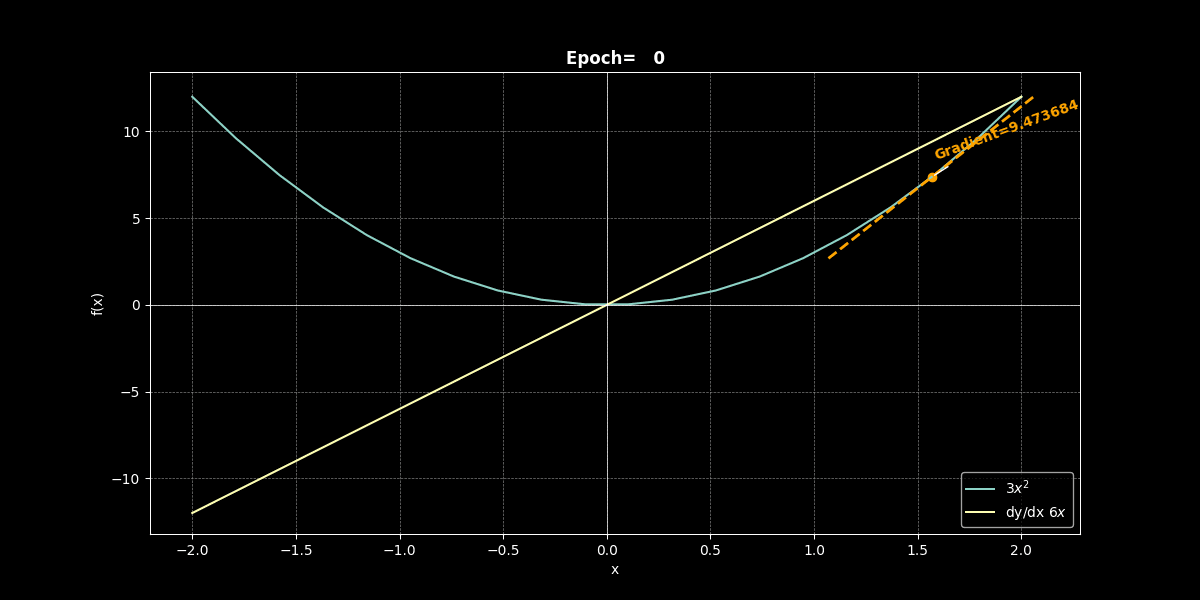

In [10]:
Image(filename='./gradient1D.gif')